# Proyecto EDA

## **Introducción y objetivo**

**Enfoque elegido:** Evolución global de la energía renovable.

**Justificación:**
La evolución temporal de la energía renovable permite evaluar el avance real de la transición energética, identificar cambios de ritmo y extraer conclusiones relevantes para la toma de decisiones estratégicas.

**Historia a contar:**
Analizar cómo ha cambiado la producción/consumo de energía renovable a lo largo del tiempo, detectando tendencias, puntos de inflexión y posibles periodos de estancamiento.

## **Fuente de datos**

**Dataset elegido:** Share of final energy use that comes from renewable sources — Our World in Data (CSV)

**Fuente:** Our World in Data presenta datos globales de energía, incluyendo métricas de participación de energías renovables en el consumo total de energía.

**URL de descarga propuesta:**
- https://archive.ourworldindata.org/20260130-180113/grapher/share-of-final-energy-consumption-from-renewable-sources.html
  
**Preguntas clave a partir de los datos:**
1. ¿Cómo ha evolucionado la energía renovable a nivel global a lo largo del tiempo?
2. ¿Se identifican periodos de crecimiento acelerado?
3. ¿Existen fases de estancamiento o desaceleración?

## **Carga de datos**

In [51]:
import pandas as pd       # Para manipulación de datos
import matplotlib.pyplot as plt  # Para gráficos básicos
import seaborn as sns     # Para visualizaciones más avanzadas
import missingno as msno


# Opcional: para que los gráficos se vean dentro del notebook
%matplotlib inline

# Estilo de Seaborn para gráficos
sns.set_style(style="whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)

In [52]:
# Carga CSV
csv_path = "dataset/share-of-final-energy-consumption-from-renewable-sources.csv"
df = pd.read_csv(csv_path)

# Información y estadísticas
df.info()
df.describe()

# Primer vistazo
df.head(10)


<class 'pandas.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 4 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            5599 non-null   str    
 1   Code                                                              5185 non-null   str    
 2   Year                                                              5599 non-null   int64  
 3   Renewable energy share in the total final energy consumption (%)  5599 non-null   float64
dtypes: float64(1), int64(1), str(2)
memory usage: 175.1 KB


,Entity,Code,Year,Renewable energy share in the total final energy consumption (%)
0,Afghanistan,AFG,2000,44.99
1,Afghanistan,AFG,2001,45.60
2,Afghanistan,AFG,2002,37.83
3,Afghanistan,AFG,2003,36.66
4,Afghanistan,AFG,2004,44.24
5,Afghanistan,AFG,2005,33.88
6,Afghanistan,AFG,2006,31.89
7,Afghanistan,AFG,2007,28.78
8,Afghanistan,AFG,2008,21.17
9,Afghanistan,AFG,2009,16.53


In [53]:
print(df.isnull().sum())


Entity                                                                0
Code                                                                414
Year                                                                  0
Renewable energy share in the total final energy consumption (%)      0
dtype: int64


## **Limpieza y preprocesado**

In [54]:
# Filtrar solo datos globales
df_global = df[df['Entity'] == 'World'].copy()
df_global.reset_index(drop=True, inplace=True)  # Reiniciar el índice

# Renombrar columnas para trabajar más cómodo
df_global.rename(columns={
    'Renewable energy share in the total final energy consumption (%)': 'renewable_share'
}, inplace=True)

df_global.head(10)

,Entity,Code,Year,renewable_share
0,World,OWID_WRL,2000,15.71
1,World,OWID_WRL,2001,15.41
2,World,OWID_WRL,2002,15.38
3,World,OWID_WRL,2003,15.21
4,World,OWID_WRL,2004,14.93
5,World,OWID_WRL,2005,14.83
6,World,OWID_WRL,2006,14.87
7,World,OWID_WRL,2007,14.70
8,World,OWID_WRL,2008,14.82
9,World,OWID_WRL,2009,15.22


## **Análisis univariante/bivariante**

In [55]:
# Incremento absoluto año a año
df_global['annual_change'] = df_global['renewable_share'].diff()
# Crecimiento porcentual anual
df_global['annual_growth_pct'] = df_global['renewable_share'].pct_change() * 100


df_global[['Year', 'renewable_share', 'annual_change', 'annual_growth_pct']]


,Year,renewable_share,annual_change,annual_growth_pct
0,2000,15.71,NaN,NaN
1,2001,15.41,-0.30,-1.909612
2,2002,15.38,-0.03,-0.194679
3,2003,15.21,-0.17,-1.105332
4,2004,14.93,-0.28,-1.840894
5,2005,14.83,-0.10,-0.669792
6,2006,14.87,0.04,0.269724
7,2007,14.70,-0.17,-1.143241
8,2008,14.82,0.12,0.816327
9,2009,15.22,0.40,2.699055


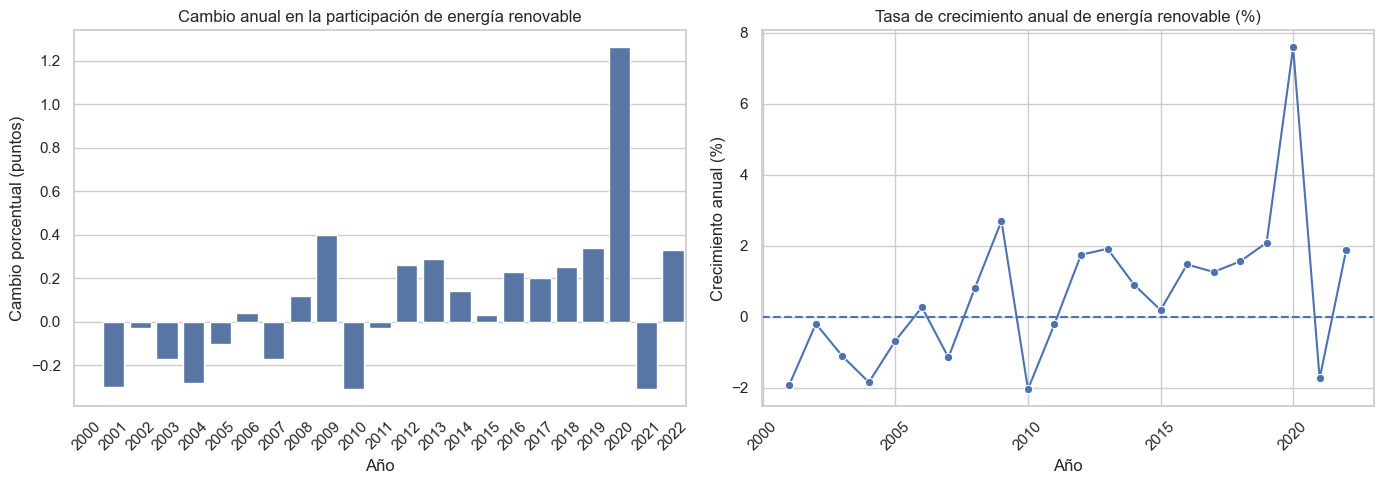

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=df_global, x='Year', y='annual_change', ax=axes[0])
axes[0].set_title('Cambio anual en la participación de energía renovable')
axes[0].set_ylabel('Cambio porcentual (puntos)')
axes[0].set_xlabel('Año')
axes[0].tick_params(axis='x', rotation=45)


sns.lineplot(data=df_global, x='Year', y='annual_growth_pct', marker='o')

axes[1].axhline(0, linestyle='--')
axes[1].set_title('Tasa de crecimiento anual de energía renovable (%)')
axes[1].set_ylabel('Crecimiento anual (%)')
axes[1].set_xlabel('Año')
axes[1].tick_params(axis='x', rotation=45)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


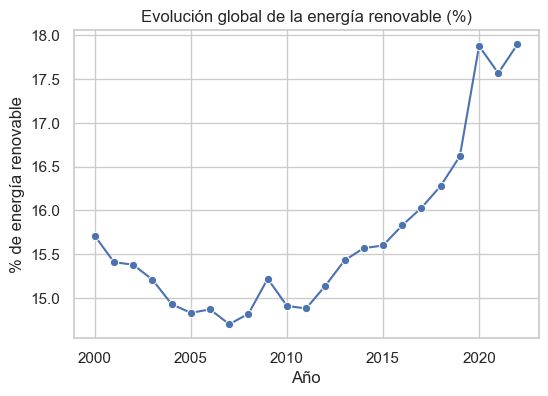

In [57]:
sns.lineplot(data=df_global, x='Year', y='renewable_share', marker='o')
plt.title('Evolución global de la energía renovable (%)')
plt.ylabel('% de energía renovable')
plt.xlabel('Año')
plt.grid(True)
plt.show()